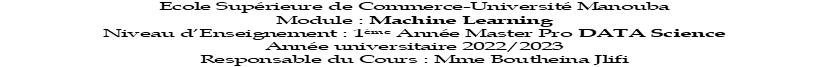

# TP3 
# Prétraitement (preprocessing)

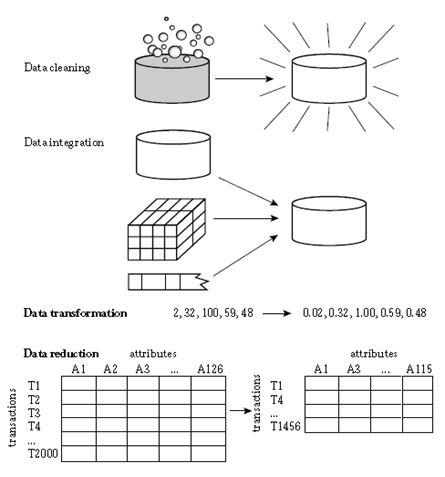

Il s'agit toujours du même projet de Credit Scoring; de prédiction d'attribution de Crédits Habitat à une clientèle d'une Banque.

On va avancer dans le data science/machine learning pipeline. On va effectuer le prétraitement avec ses différentes étapes précisées dans le cours (Chapitre3ML)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection


In [2]:

df1 = pd.read_csv("Partie1DatasetTP2.csv") 
df1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df2 = pd.read_csv("Partie2DatasetTP2.csv")
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Avant de commencer le preprocessing

Il est préférable de copier les datasets d'origine car cette étape va effectuer des transformations sur les datasets d'origine


In [4]:
train_original = df1.copy()
test_original = df2.copy()


# 2-Integration 

In [5]:
# On va fusionner les 2 datasets
df = df2.append(df1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 1- Nettoyage (Cleaning)

## 1.1Valeurs manquantes  

In [6]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#On peut ajouter les pourcentages
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


###  Remplissage des vides pour Variables catégorielles

In [8]:
print(df1.describe(include='object'))
# permet de savoir les var categ les plus fréquentes (rappel de tp2)

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001669   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  


In [9]:
df1["Loan_Status"] = df1["Loan_Status"].replace(np.nan,"Y") #on a choisi de remplacer les valeurs non définies par yes
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###  Remplissage des vides pour Variables numériques 

In [10]:
df1["LoanAmount"] = df1["LoanAmount"].replace(np.nan,df1['LoanAmount'].median())
df1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df1.isna().sum()   #on peut utiliser isnull

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:

df1["Gender"].fillna(df1["Gender"].mode(),inplace=True)
df1["Gender"].mode() 


0    Male
dtype: object

In [15]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## A retenir

### Activité1
Refaire le même travail pour le reste des variables


## 1.2 Valeurs dupliquées 

In [13]:
df1.duplicated().any() #on vérifie s'il y a des duplications

False

In [14]:
#Exemple explicatif
dfexemple = pd.DataFrame({

    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],

    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],

    'rating': [4, 4, 3.5, 15, 5]

})

dfexemple.duplicated().any() # on va vérifier s'il y a des duplications
dfexemple

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [15]:
dfexemple.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [16]:
df.drop_duplicates(keep=False, inplace=True)# keep = false on va supprimer tous les duplicates on ne va pas garder first ou last
#inplace= True ou Flase pour retourner une copie ou non
df.duplicated().any()

False

# 3-Transformation 

## 3.1 Codage : Binarisation

In [17]:
df1["Loan_Status"]= df1["Loan_Status"].replace("Y",1)
df1["Loan_Status"]= df1["Loan_Status"].replace("N",0)

df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### Activité2
Faire de même pour les autres variables

## 3.2 Codage: Normalisation 
Normalisation + Standardisation: Il s'agit d'une mise à l'échelle 

In [18]:
cols_to_normalize = ['LoanAmount','ApplicantIncome']
df1[cols_to_normalize] = df1[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.0,0.172214,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,0.054830,1508.0,0.172214,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.0,0.082489,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,2358.0,0.160637,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.072356,0.0,0.191027,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.0,0.089725,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.0,0.044863,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,0.097984,240.0,0.353111,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.0,0.257598,360.0,1.0,Urban,1


### Activité3 

## 3.2 Codage: Standardisation 

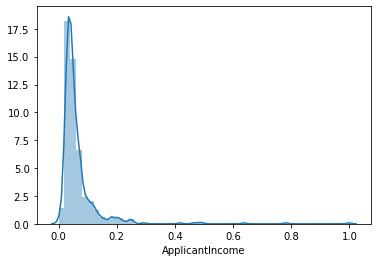

In [19]:
sns.distplot(df1["ApplicantIncome"]);

In [20]:
from sklearn.preprocessing import StandardScaler
df1_scaled = StandardScaler().fit_transform(df1['ApplicantIncome'][:,np.newaxis]);

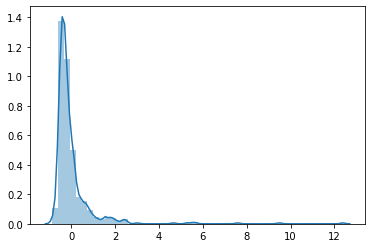

In [21]:
data_df = pd.DataFrame(df1_scaled)
sns.distplot(data_df)

### Activité 4
Faire de même pour toute variable non centrée et réduite


##  3.3 Codage: Transformation d'attribut structuré

In [22]:
#Variable dummy ou muette
dfdummy=pd.get_dummies(df1.Property_Area)
dfdummy

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [23]:
#On va coller les nouvelles variable catégorilles (dfdummy) dans la dataset df
Nouveaudf= pd.concat([df1,dfdummy], axis='columns')
Nouveaudf
#On va supprimer la colonne relative à la variable catégorielle du dataset vu qu'elle a été remplacée par les nouvelles 
#colonnes 
df= Nouveaudf.drop(['Property_Area'], axis='columns')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.0,0.172214,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,0.054830,1508.0,0.172214,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.0,0.082489,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,2358.0,0.160637,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.072356,0.0,0.191027,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.0,0.089725,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.0,0.044863,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,0.097984,240.0,0.353111,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.0,0.257598,360.0,1.0,Urban,1


### Activité 5
Faire de même pour les autres variables structurées si c'est nécessaire

## 3.4 Codage: Discrétisation

# 4-Réduction des données 

## 4.1 Réduction de dimensions

In [24]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.0,0.172214,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,0.054830,1508.0,0.172214,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.0,0.082489,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,2358.0,0.160637,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.072356,0.0,0.191027,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.0,0.089725,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.0,0.044863,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,0.097984,240.0,0.353111,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.0,0.257598,360.0,1.0,Urban,1


In [25]:
#On va enlever Loan_Id vu que ce n'est pas un attribut important
df1.drop("Loan_ID",axis=1,inplace=True)

In [26]:
df1.shape

(614, 12)

In [27]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.070489,0.0,0.172214,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,0.054830,1508.0,0.172214,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,0.035250,0.0,0.082489,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,0.030093,2358.0,0.160637,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,0.072356,0.0,0.191027,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,0.034014,0.0,0.089725,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,0.048930,0.0,0.044863,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,0.097984,240.0,0.353111,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,0.091936,0.0,0.257598,360.0,1.0,Urban,1


### Activité6

## 4.2 Réduction de numérosité: échantillonage

In [29]:
#Supposons qu'on veut travailler sur X égal à la varibla LoanAmount
X = df1[['LoanAmount']]
y= df1[['Loan_Status']]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2)
print (X_train.shape)
print (X_test.shape)
print(X_train)
print (y_train)

(491, 1)
(123, 1)
     LoanAmount
591    0.283647
518    0.254703
473    0.121563
382    0.212735
306    0.182344
..          ...
364    0.191027
133    0.023155
485    0.176556
174    0.112880
595    0.146165

[491 rows x 1 columns]
     Loan_Status
591            0
518            0
473            1
382            1
306            1
..           ...
364            1
133            1
485            1
174            0
595            1

[491 rows x 1 columns]


### Activité 7
On veut que la taille de l'ensemble d'apprentissage soit 70% de la taille du dataset

## Remarques importantes